<a href="https://colab.research.google.com/github/ruedas91/FinTechruedas/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activating Your First Neural Network

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
# Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [ ]:
, make_classification
# Generate 1000 demo data samples with 3 features and two centers
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1)

In [ ]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3"])
df["target"] = y
df.head()

,Feature 1,Feature 2,Feature 3,target
0,1.264746,0.066036,0.806861,0
1,0.744357,0.614144,0.566766,1
2,-1.131491,0.793957,-0.585587,1
3,0.360611,-2.752709,-0.212663,0
4,1.265037,-0.539162,0.710371,0


### Data Preprocessing

Use `train_test_split` to create training and testing data.

In [ ]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Scale the data using the `StandarScaler`.

In [ ]:
# Create scaler instance
X_scaler = StandardScaler()

In [ ]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [ ]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Neural Network Model Creation

In [ ]:
# Create a sequential model
neuron = Sequential()

#### Add the first layer of our neural network.

In [ ]:
# First layer
number_inputs = 3 #how many features will be taken in 
number_hidden_nodes = 6
neuron.add(
    Dense(
        units=number_hidden_nodes,
        activation="relu",
        input_dim=number_inputs
    )
)

#### We finish creating our neural network by adding the output layer.


In [ ]:
# Output layer
output_nodes = 1

neuron.add(
    Dense(
        units=output_nodes,
        activation="sigmoid"
    )
)

In [ ]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [ ]:
# Compile model
neuron.compile(
    loss="binary_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
    )

### Fit the Model

In [ ]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 4ms/step - loss: 0.6253 - accuracy: 0.6680
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.6960
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5713 - accuracy: 0.7413
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7773
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.8067
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5014 - accuracy: 0.8587
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.8747
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.8853
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8907
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8960
Epoch 11/

### Evaluate the Model

#### Plotting the Loss Function and Accuracy

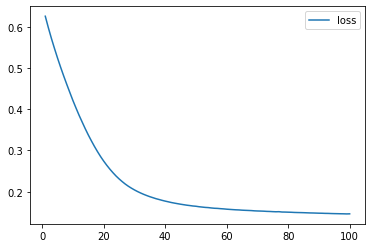

In [ ]:
# Create a dataframe with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

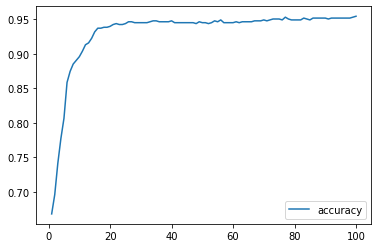

In [ ]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [ ]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

8/8 - 0s - loss: 0.1340 - accuracy: 0.9480 - 150ms/epoch - 19ms/step


 ### Making Predictions with New Data

In [ ]:
# Create 10 new samples of dummy data



In [ ]:
# Making predictions
predictions = (neuron.predict(X_test_scaled) > 0.4).astype("int32")
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test.ravel()})
results.head(10)

8/8 [==============================] - 0s 2ms/step


,predictions,actual
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


 ## Using a Single Neuron for Non-Linear Data

 ### Creating Demo Data

In [ ]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [ ]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [ ]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
df_moons.head()

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


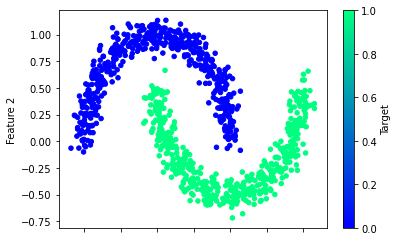

In [ ]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [ ]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=1
)

 Scale the data

In [ ]:
# Create the scaler instance
X_moon_scaler = StandardScaler()

In [ ]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [ ]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [ ]:
# Create the sequential model
nn = Sequential()

In [ ]:
# First layer
number_inputs = 2
number_hidden_nodes = 6

nn.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [ ]:
# Output layer
number_classes = 1

nn.add(Dense(units=number_classes, activation="sigmoid"))

 ### Fit the Model

In [ ]:
# Model summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


Compile the Moodel

In [ ]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Fit the Model

In [ ]:
# Training the model with the non-linear data
model_moon = nn.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8098 - accuracy: 0.1320
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.1347
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.1453
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.2173
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4680
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6107
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6387
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6760
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.7173
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7853
Epoch 11/

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

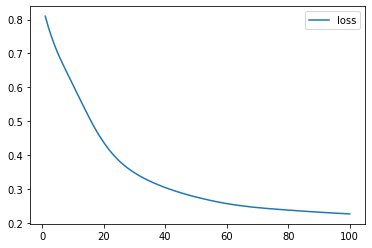

In [ ]:
# Create a dataframe with the history dictionary
df_moons = pd.DataFrame(model_moon.history, index=range(1, len(model_moon.history["loss"]) + 1))

# Plot the loss
df_moons.plot(y="loss")

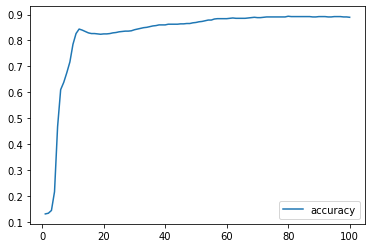

In [ ]:
# Plot the accuracy
df_moons.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [ ]:
# Evaluate the model using non-linear data
model_moon_loss, model_moon_accuracy = nn.evaluate(
    X_moon_test_scaled, y_moon_test, verbose=2
)
print(f"Loss: {model_moon_loss}, Accuracy: {model_moon_accuracy}")

8/8 - 0s - loss: 0.2360 - accuracy: 0.8920 - 117ms/epoch - 15ms/step
Loss: 0.23603691160678864, Accuracy: 0.8920000195503235


 ### Making Predictions

In [ ]:
# Making predictions
predictions = (nn.predict(X_moon_test_scaled) > 0.5).astype("int32")
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_moon_test.ravel()})
results.head(10)

8/8 [==============================] - 0s 2ms/step


,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0
